In [1]:
# Importing the data
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Forecasting\\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
# Data Exploration
df.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.shape  # Display the number of rows and columns in the dataset

(96, 2)

In [5]:
df.head()  # Display the first few rows of the dataset

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
df.tail()  # Display the last few rows of the dataset

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [7]:
df.isnull().sum()  # Check for missing values in the dataset

Month         0
Passengers    0
dtype: int64

In [8]:
df.rename({'Month':'Date'}, axis=1, inplace=True)

In [9]:
df

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [10]:
"""Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data"""
""" Creating the Dummy Variables """
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")

In [11]:
df["month"] = df.Date.dt.strftime("%b") # month extraction

In [12]:
df["year"]  = df.Date.dt.strftime("%Y") # year extraction

In [13]:
df.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [16]:
# Plotting the time series data with 'Month' as the DateTime index
import matplotlib.pyplot as plt

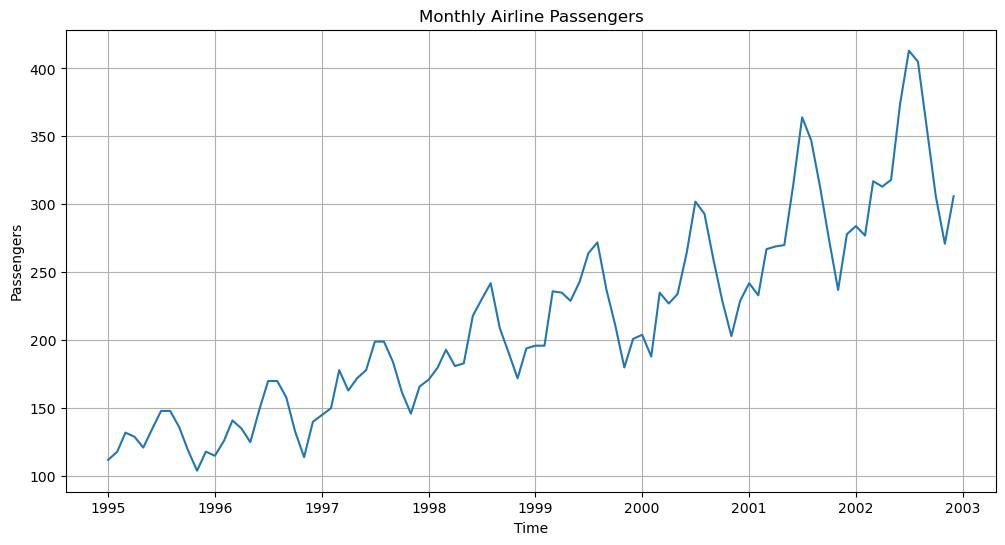

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'])
plt.title('Monthly Airline Passengers')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [18]:
# Plotting the data with separate 'Month' and 'Year' columns
import matplotlib.pyplot as plt

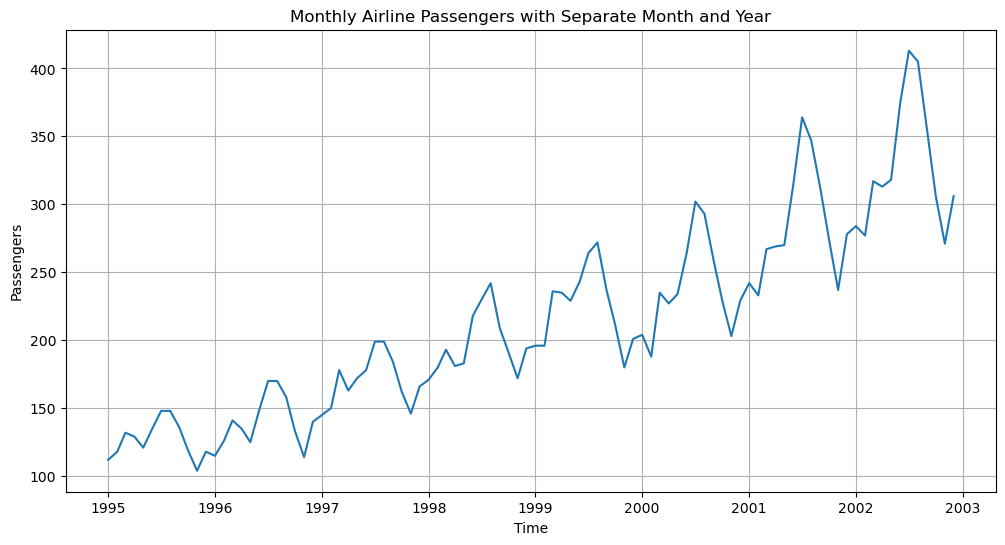

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'])
plt.title('Monthly Airline Passengers with Separate Month and Year')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [20]:
# Line Plot
import matplotlib.pyplot as plt

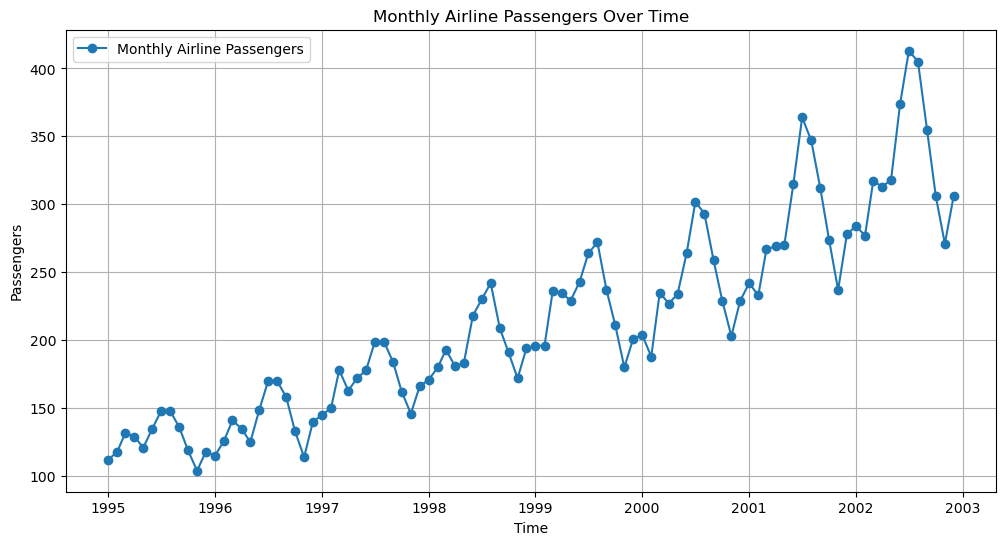

In [21]:
# Plotting the time series data with separate 'Month' and 'Year' columns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Monthly Airline Passengers', marker='o', linestyle='-')
plt.title('Monthly Airline Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
# Box Plot of Each Year by Monthly Intervals
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='month', ylabel='Passengers'>

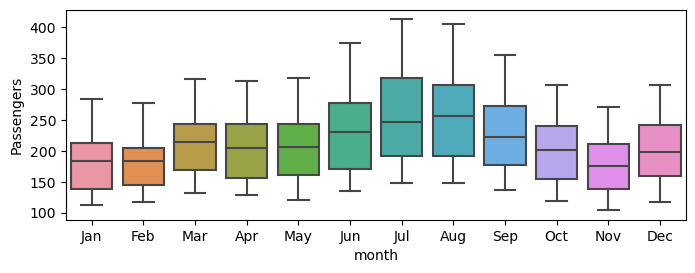

In [23]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

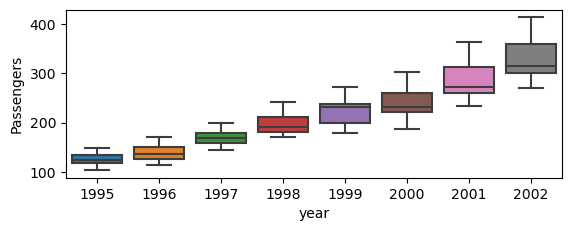

In [24]:
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

In [25]:
# Adding 't', 't_square', and 't_log' columns
df['t'] = np.arange(1, len(df) + 1)

In [26]:
df['t_square'] = df['t'] ** 2

In [27]:
df['t_log'] = np.log(df['t'])

In [28]:
df.head()

,Passengers,month,year,t,t_square,t_log
Date,,,,,,
1995-01-01,112,Jan,1995,1,1,0.000000
1995-02-01,118,Feb,1995,2,4,0.693147
1995-03-01,132,Mar,1995,3,9,1.098612
1995-04-01,129,Apr,1995,4,16,1.386294
1995-05-01,121,May,1995,5,25,1.609438


In [29]:
# Histogram and Density Plots
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Create 'Month' and 'Year' columns if not done already
df['Month'] = df.index.month

In [31]:
df['Year'] = df.index.year

In [32]:
# Plotting histogram and density plot for monthly airline passengers
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

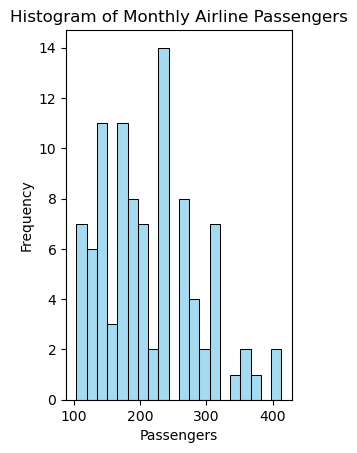

In [33]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Passengers'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Monthly Airline Passengers')
plt.xlabel('Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

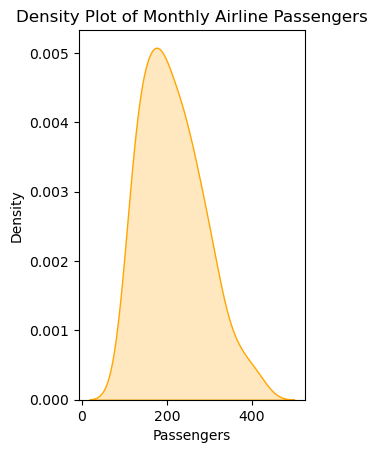

In [34]:
# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['Passengers'], color='orange', fill=True)
plt.title('Density Plot of Monthly Airline Passengers')
plt.xlabel('Passengers')
plt.ylabel('Density')

In [36]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [37]:
# lag Plot
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

In [38]:
# Create 'Month' and 'Year' columns if not done already
df['Month'] = df.index.month

In [39]:
df['Year'] = df.index.year

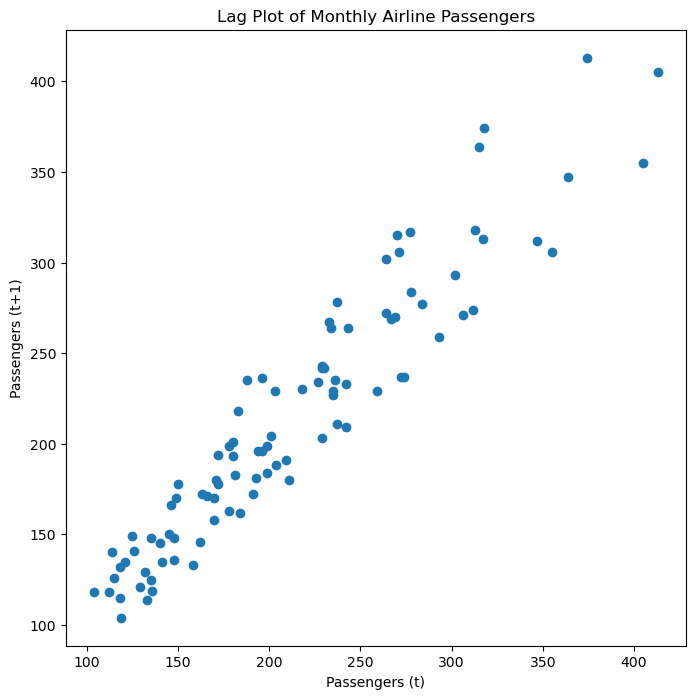

In [40]:
# Plotting lag plot for monthly airline passengers
plt.figure(figsize=(8, 8))
lag_plot(df['Passengers'])
plt.title('Lag Plot of Monthly Airline Passengers')
plt.xlabel('Passengers (t)')
plt.ylabel('Passengers (t+1)')
plt.show()

In [41]:
# Moving Average
import pandas as pd

In [42]:
# Calculate the rolling mean (moving average) with a window of your choice
window_size = 12  # Adjust the window size as needed
df['Rolling_Mean'] = df['Passengers'].rolling(window=window_size).mean()

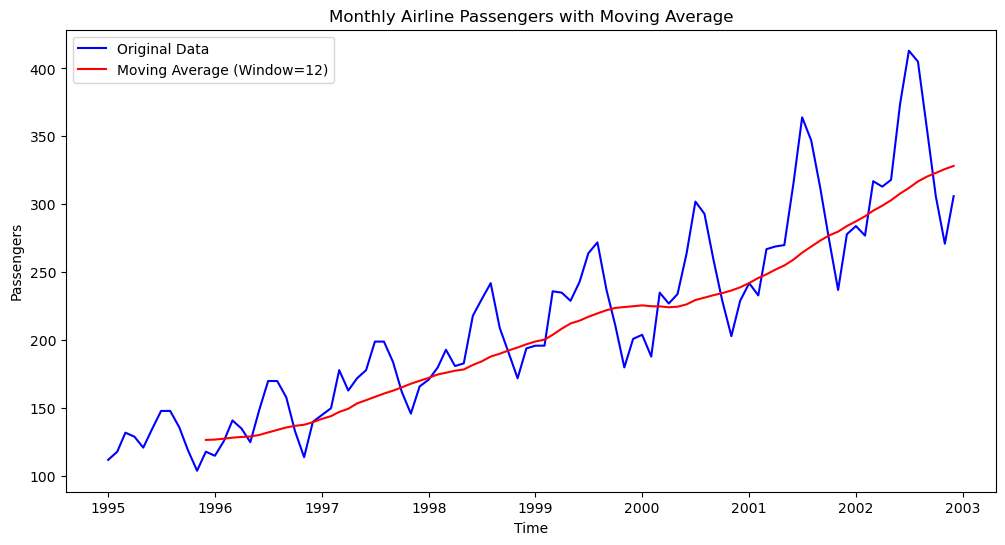

In [43]:
# Plotting the original time series and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Original Data', color='blue')
plt.plot(df['Rolling_Mean'], label=f'Moving Average (Window={window_size})', color='red')
plt.title('Monthly Airline Passengers with Moving Average')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [44]:
# Statistical Models:
import statsmodels.api as sms
import statsmodels.api as sm

In [45]:
# Splitting the data into train and test sets
size = 72

In [46]:
train_data = df[:size]

In [47]:
test_data = df[size:]

In [48]:
train_data

,Passengers,month,year,t,t_square,t_log,Month,Year,Rolling_Mean
Date,,,,,,,,,
1995-01-01,112,Jan,1995,1,1,0.000000,1,1995,NaN
1995-02-01,118,Feb,1995,2,4,0.693147,2,1995,NaN
1995-03-01,132,Mar,1995,3,9,1.098612,3,1995,NaN
1995-04-01,129,Apr,1995,4,16,1.386294,4,1995,NaN
1995-05-01,121,May,1995,5,25,1.609438,5,1995,NaN
...,...,...,...,...,...,...,...,...,...
2000-08-01,293,Aug,2000,68,4624,4.219508,8,2000,231.333333
2000-09-01,259,Sep,2000,69,4761,4.234107,9,2000,233.166667
2000-10-01,229,Oct,2000,70,4900,4.248495,10,2000,234.666667


In [49]:
test_data

,Passengers,month,year,t,t_square,t_log,Month,Year,Rolling_Mean
Date,,,,,,,,,
2001-01-01,242,Jan,2001,73,5329,4.290459,1,2001,242.083333
2001-02-01,233,Feb,2001,74,5476,4.304065,2,2001,245.833333
2001-03-01,267,Mar,2001,75,5625,4.317488,3,2001,248.500000
2001-04-01,269,Apr,2001,76,5776,4.330733,4,2001,252.000000
2001-05-01,270,May,2001,77,5929,4.343805,5,2001,255.000000
2001-06-01,315,Jun,2001,78,6084,4.356709,6,2001,259.250000
2001-07-01,364,Jul,2001,79,6241,4.369448,7,2001,264.416667
2001-08-01,347,Aug,2001,80,6400,4.382027,8,2001,268.916667
2001-09-01,312,Sep,2001,81,6561,4.394449,9,2001,273.333333


In [50]:
# Linear Model
X_train_linear = sm.add_constant(train_data[['t']])

In [51]:
Y_train_linear = train_data['Passengers']

In [52]:
linear_model = sm.OLS(Y_train_linear, X_train_linear).fit()

In [53]:
# Quadratic Model
X_train_quad = sm.add_constant(train_data[['t', 't_square']])

In [54]:
Y_train_quad = train_data['Passengers']

In [55]:
quadratic_model = sm.OLS(Y_train_quad, X_train_quad).fit()

In [56]:
# Exponential Model
X_train_exp = sm.add_constant(train_data[['t_log']])

In [57]:
Y_train_exp = train_data['Passengers']

In [58]:
exponential_model = sm.OLS(Y_train_exp, X_train_exp).fit()

In [59]:
# Predictions on the test set for the Linear Model
X_test_linear = sm.add_constant(test_data[['t']])

In [60]:
pred_linear = linear_model.predict(X_test_linear)

In [61]:
# Predictions on the test set for the Quadratic Model
X_test_quad = sm.add_constant(test_data[['t', 't_square']])

In [62]:
pred_quad = quadratic_model.predict(X_test_quad)

In [63]:
# Predictions on the test set for the Exponential Model
X_test_exp = sm.add_constant(test_data[['t_log']])

In [64]:
pred_exp = exponential_model.predict(X_test_exp)

In [65]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

In [66]:
mse_linear = mean_squared_error(test_data['Passengers'], pred_linear)

In [67]:
mse_quad = mean_squared_error(test_data['Passengers'], pred_quad)

In [68]:
mse_exp = mean_squared_error(test_data['Passengers'], pred_exp)

In [69]:
rmse_linear = np.sqrt(mse_linear)

In [70]:
rmse_quad = np.sqrt(mse_quad)

In [71]:
rmse_exp = np.sqrt(mse_exp)

In [72]:
# Display MSE and RMSE for each model
print("MSE for Linear Model:", mse_linear)
print("RMSE for Linear Model:", rmse_linear)

MSE for Linear Model: 2669.5608330409536
RMSE for Linear Model: 51.667792995646266


In [73]:
print("MSE for Quadratic Model:", mse_quad)
print("RMSE for Quadratic Model:", rmse_quad)

MSE for Quadratic Model: 2703.036671575855
RMSE for Quadratic Model: 51.99073640155383


In [74]:
print("MSE for Exponential Model:", mse_exp)
print("RMSE for Exponential Model:", rmse_exp) 

MSE for Exponential Model: 8342.291930588757
RMSE for Exponential Model: 91.33614799513256


In [75]:
# Visualisation
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [76]:
# Plotting the original time series, rolling mean, and model predictions
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

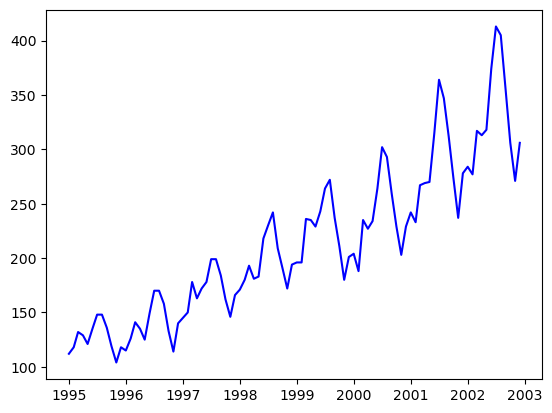

In [77]:
# Original time series
plt.plot(df.index, df['Passengers'], label='Original Data', color='blue')

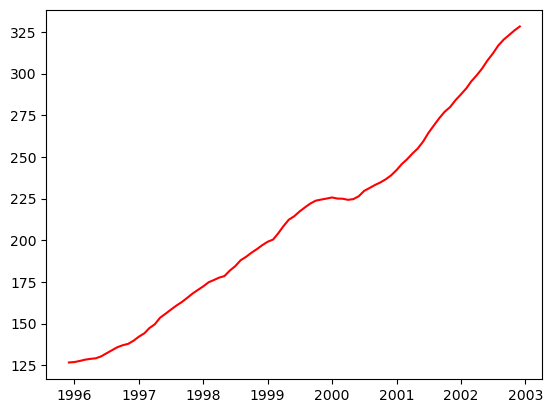

In [78]:
# Rolling mean
plt.plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')

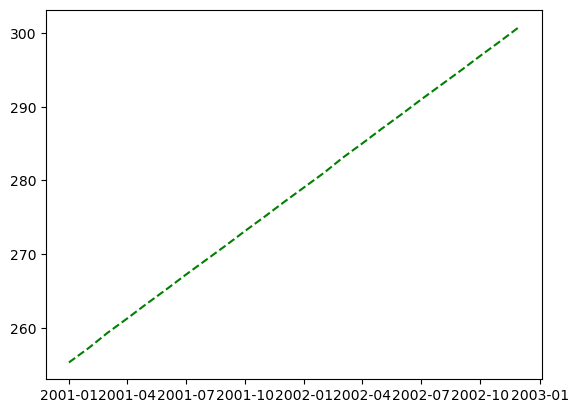

In [79]:
# Linear model predictions
plt.plot(test_data.index, pred_linear, label='Linear Model Predictions', linestyle='--', color='green')

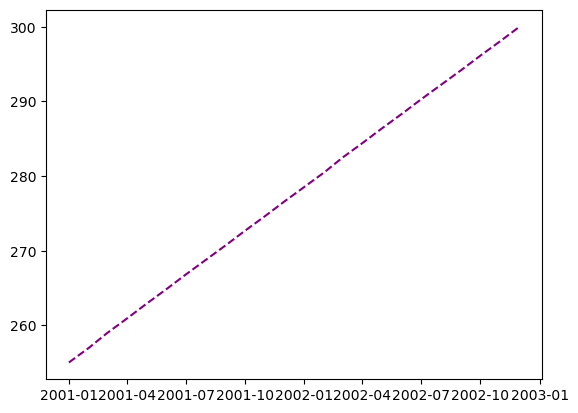

In [80]:
# Quadratic model predictions
plt.plot(test_data.index, pred_quad, label='Quadratic Model Predictions', linestyle='--', color='purple')

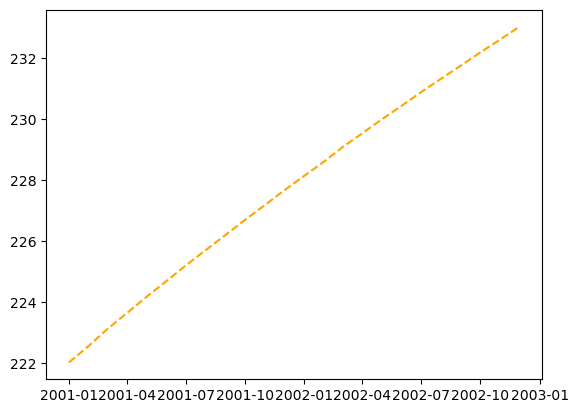

In [81]:
# Exponential model predictions
plt.plot(test_data.index, pred_exp, label='Exponential Model Predictions', linestyle='--', color='orange')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


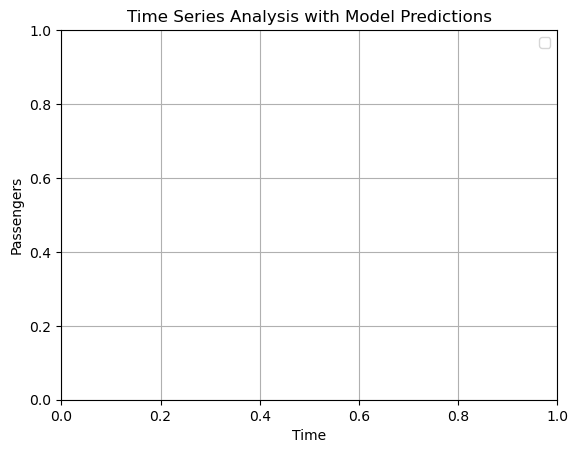

In [82]:
plt.title('Time Series Analysis with Model Predictions')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
import statsmodels.api as sm

In [84]:
# Additional Seasonality
X_train_add_seasonal = sm.add_constant(train_data[['t']])

In [85]:
X_train_add_seasonal['seasonal'] = np.sin(2 * np.pi * X_train_add_seasonal['t'] / 12)

In [86]:
Y_train_add_seasonal = train_data['Passengers']

In [87]:
add_seasonal_model = sm.OLS(Y_train_add_seasonal, X_train_add_seasonal).fit()

In [88]:
# Multiplicative Seasonality
X_train_mult_seasonal = sm.add_constant(train_data[['t']])

In [89]:
X_train_mult_seasonal['seasonal'] = np.sin(2 * np.pi * X_train_mult_seasonal['t'] / 12)

In [90]:
Y_train_mult_seasonal = train_data['Passengers']

In [91]:
mult_seasonal_model = sm.OLS(np.log(Y_train_mult_seasonal), X_train_mult_seasonal).fit()

In [92]:
# Additive Seasonality with Quadratic Terms
X_train_add_quad_seasonal = sm.add_constant(train_data[['t', 't_square']])

In [93]:
X_train_add_quad_seasonal['seasonal'] = np.sin(2 * np.pi * X_train_add_quad_seasonal['t'] / 12)

In [94]:
Y_train_add_quad_seasonal = train_data['Passengers']

In [95]:
add_quad_seasonal_model = sm.OLS(Y_train_add_quad_seasonal, X_train_add_quad_seasonal).fit()

In [96]:
# Multiplicative Additive Seasonality
X_train_mult_add_seasonal = sm.add_constant(train_data[['t']])

In [97]:
X_train_mult_add_seasonal['seasonal'] = np.sin(2 * np.pi * X_train_mult_add_seasonal['t'] / 12)

In [98]:
Y_train_mult_add_seasonal = train_data['Passengers']

In [99]:
mult_add_seasonal_model = sm.OLS(np.log(Y_train_mult_add_seasonal), X_train_mult_add_seasonal).fit()

In [100]:
# Predictions on the test set for each model
X_test_add_seasonal = sm.add_constant(test_data[['t']])

In [101]:
X_test_add_seasonal['seasonal'] = np.sin(2 * np.pi * X_test_add_seasonal['t'] / 12)

In [102]:
pred_add_seasonal = add_seasonal_model.predict(X_test_add_seasonal)

In [103]:
X_test_mult_seasonal = sm.add_constant(test_data[['t']])

In [104]:
X_test_mult_seasonal['seasonal'] = np.sin(2 * np.pi * X_test_mult_seasonal['t'] / 12)

In [105]:
pred_mult_seasonal = np.exp(mult_seasonal_model.predict(X_test_mult_seasonal))

In [106]:
X_test_add_quad_seasonal = sm.add_constant(test_data[['t', 't_square']])

In [107]:
X_test_add_quad_seasonal['seasonal'] = np.sin(2 * np.pi * X_test_add_quad_seasonal['t'] / 12)

In [108]:
pred_add_quad_seasonal = add_quad_seasonal_model.predict(X_test_add_quad_seasonal)

In [109]:
X_test_mult_add_seasonal = sm.add_constant(test_data[['t']])

In [110]:
X_test_mult_add_seasonal['seasonal'] = np.sin(2 * np.pi * X_test_mult_add_seasonal['t'] / 12)

In [111]:
pred_mult_add_seasonal = np.exp(mult_add_seasonal_model.predict(X_test_mult_add_seasonal))

In [112]:
# Calculate RMSE for each model
rmse_add_seasonal = np.sqrt(mean_squared_error(test_data['Passengers'], pred_add_seasonal))

In [113]:
rmse_mult_seasonal = np.sqrt(mean_squared_error(test_data['Passengers'], pred_mult_seasonal))

In [114]:
rmse_add_quad_seasonal = np.sqrt(mean_squared_error(test_data['Passengers'], pred_add_quad_seasonal))

In [115]:
rmse_mult_add_seasonal = np.sqrt(mean_squared_error(test_data['Passengers'], pred_mult_add_seasonal))

In [116]:
# Display RMSE for each model
print("RMSE for Additional Seasonality Model:", rmse_add_seasonal)
print("RMSE for Multiplicative Seasonality Model:", rmse_mult_seasonal)
print("RMSE for Additive Seasonality with Quadratic Model:", rmse_add_quad_seasonal)
print("RMSE for Multiplicative Additive Seasonality Model:", rmse_mult_add_seasonal)

RMSE for Additional Seasonality Model: 51.17350622087438
RMSE for Multiplicative Seasonality Model: 41.35693987397219
RMSE for Additive Seasonality with Quadratic Model: 51.41718142352362
RMSE for Multiplicative Additive Seasonality Model: 41.35693987397219


In [117]:
# Visualisation 
import matplotlib.pyplot as plt

In [118]:
# Plotting the original time series, rolling mean, and model predictions
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

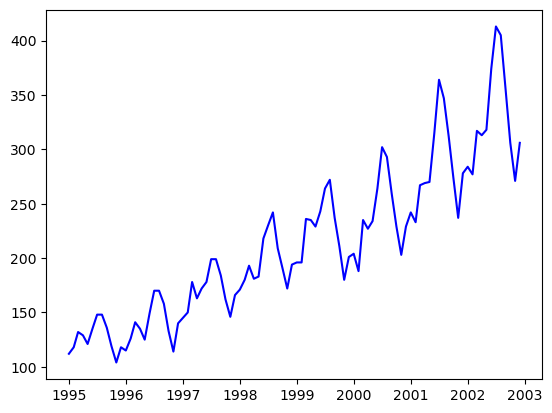

In [119]:
# Original time series
plt.plot(df.index, df['Passengers'], label='Original Data', color='blue')

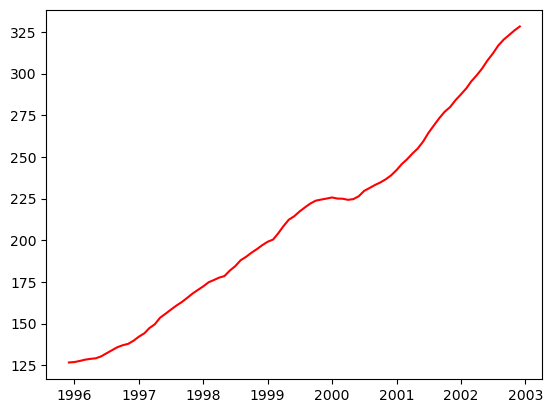

In [120]:
# Rolling mean
plt.plot(df.index, df['Rolling_Mean'], label='Rolling Mean', color='red')

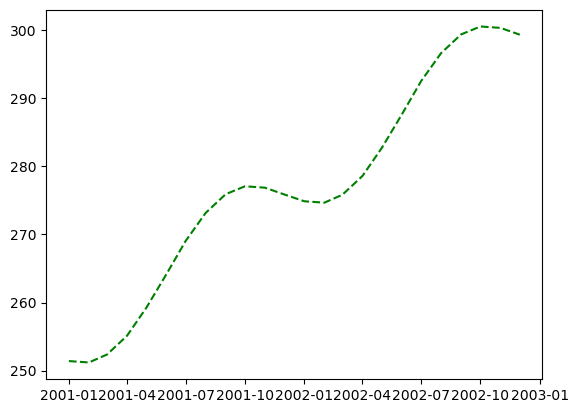

In [121]:
# Additional Seasonality model predictions
plt.plot(test_data.index, pred_add_seasonal, label='Additional Seasonality Model Predictions', linestyle='--', color='green')

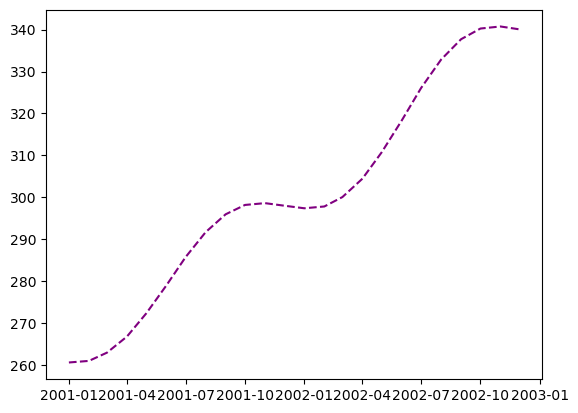

In [122]:
# Multiplicative Seasonality model predictions
plt.plot(test_data.index, pred_mult_seasonal, label='Multiplicative Seasonality Model Predictions', linestyle='--', color='purple')

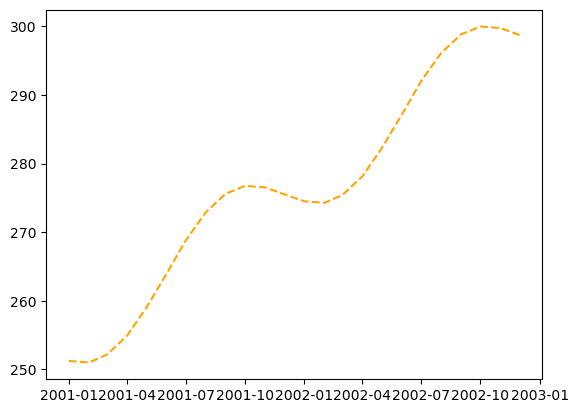

In [123]:
# Additive Seasonality with Quadratic model predictions
plt.plot(test_data.index, pred_add_quad_seasonal, label='Additive Seasonality with Quadratic Model Predictions', linestyle='--', color='orange')

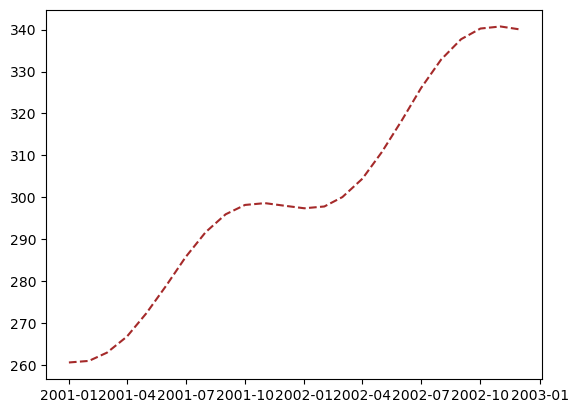

In [124]:
# Multiplicative Additive Seasonality model predictions
plt.plot(test_data.index, pred_mult_add_seasonal, label='Multiplicative Additive Seasonality Model Predictions', linestyle='--', color='brown')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


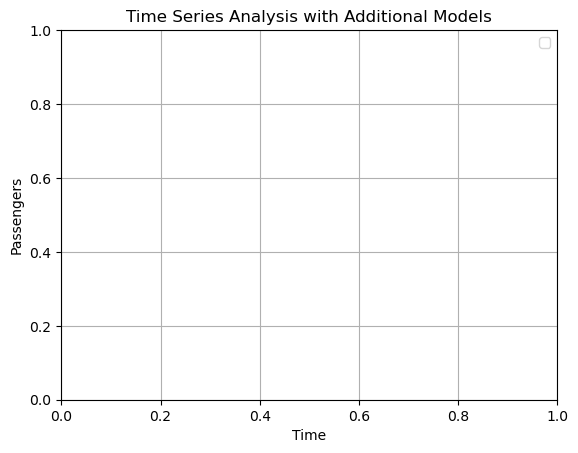

In [125]:
plt.title('Time Series Analysis with Additional Models')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
"""The seasonal column is created based on the sine function with a periodicity of 12, representing monthly seasonality. """

""" Dickey Fuller Test for testing the data is stationary or not """
from statsmodels.tsa.stattools import adfuller

In [127]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
       print("Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary")
    else:
       print("Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary")

In [128]:
adf_test(df['Passengers'])
#Since the p-value is greater than 0.05 (common significance level), 
#you do not have enough evidence to reject the null hypothesis.
#The null hypothesis of the ADF test is that the time series has a unit root (non-stationary).
#Therefore, based on the p-value, you cannot reject the null hypothesis, and the time series is considered non-stationary.
#p-value: 0.9968250481137263 indicating data is not stationary.

ADF Statistics: 1.340247959646706
p-value: 0.9968250481137263
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


In [129]:
""" using techniques Differencing   """
# First Differencing Technique
df['Passengers First Difference']=df['Passengers']-df['Passengers'].shift(1)

In [130]:
df.head()

,Passengers,month,year,t,t_square,t_log,Month,Year,Rolling_Mean,Passengers First Difference
Date,,,,,,,,,,
1995-01-01,112,Jan,1995,1,1,0.000000,1,1995,NaN,NaN
1995-02-01,118,Feb,1995,2,4,0.693147,2,1995,NaN,6.0
1995-03-01,132,Mar,1995,3,9,1.098612,3,1995,NaN,14.0
1995-04-01,129,Apr,1995,4,16,1.386294,4,1995,NaN,-3.0
1995-05-01,121,May,1995,5,25,1.609438,5,1995,NaN,-8.0


In [131]:
adf_test(df['Passengers First Difference'].dropna())
# data is still not stationary.

ADF Statistics: -2.150001735920645
p-value: 0.22488942647512905
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


In [132]:
# Second Differencing Technique
df['Passengers Second Difference'] = df['Passengers First Difference']-df['Passengers First Difference'].shift(1)
df.head()

,Passengers,month,year,t,t_square,t_log,Month,Year,Rolling_Mean,Passengers First Difference,Passengers Second Difference
Date,,,,,,,,,,,
1995-01-01,112,Jan,1995,1,1,0.000000,1,1995,NaN,NaN,NaN
1995-02-01,118,Feb,1995,2,4,0.693147,2,1995,NaN,6.0,NaN
1995-03-01,132,Mar,1995,3,9,1.098612,3,1995,NaN,14.0,8.0
1995-04-01,129,Apr,1995,4,16,1.386294,4,1995,NaN,-3.0,-17.0
1995-05-01,121,May,1995,5,25,1.609438,5,1995,NaN,-8.0,-5.0


In [133]:
adf_test(df['Passengers Second Difference'].dropna())
# data is  stationary.  # It appears that the second differencing made the data stationary (i.e., removed the unit root), suggesting a value of d=2 for the integrated part of an ARIMA model.

ADF Statistics: -11.547980944840784
p-value: 3.503180236321735e-21
Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


In [134]:
""" we are checking for over a year now  ( we are looking for seasonal differences now and sometimes ARIMA doesnot work well for seasonal data but SARIMAX Does )"""

""" Seasonality Differencing Graph """

df['Passengers 12 Difference']=df['Passengers']-df['Passengers'].shift(12)

In [135]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -2.6900043838623158
p-value: 0.07578397625851772
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


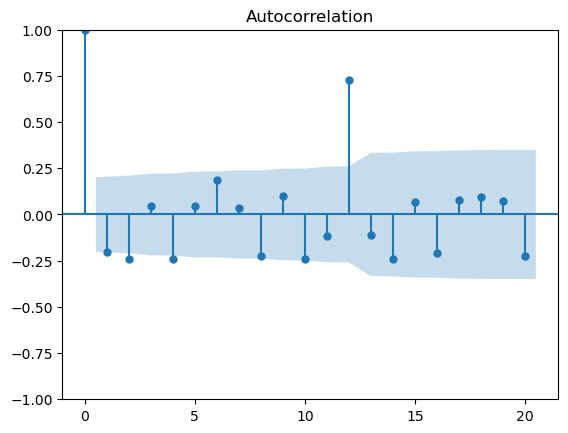

In [136]:

""" ARIMA is not working well for seasonal data in this scenario"""

"""      plotting   the acf and pacf  gives the argument values for arima function   """
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(df['Passengers Second Difference'].dropna())

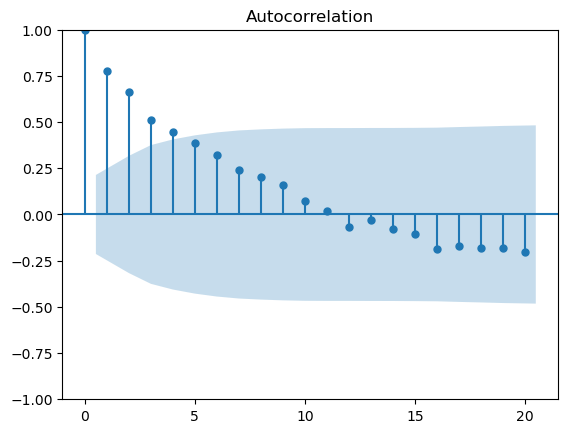

In [137]:
acf12 = plot_acf(df['Passengers 12 Difference'].dropna())

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


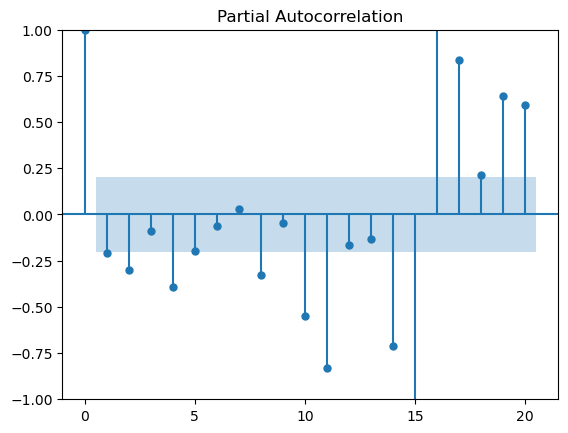

In [138]:
""" if we want to select a q value as 4 that means we can consider 4 previous seasonal data to make predictions in Seasonality Differencing Graph"""
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Passengers Second Difference'].dropna())

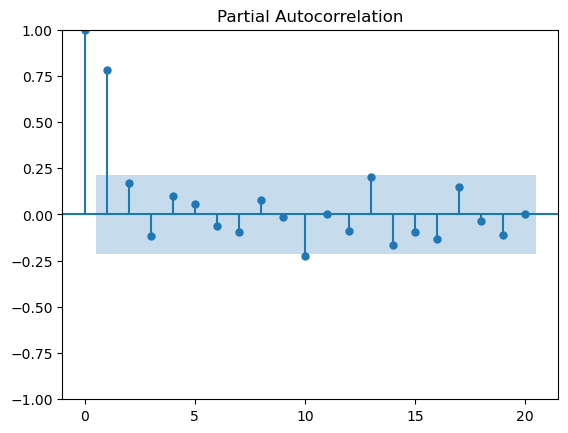

In [139]:
pacf12 = plot_pacf(df['Passengers 12 Difference'].dropna())

In [140]:
df

,Passengers,month,year,t,t_square,t_log,Month,Year,Rolling_Mean,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Date,,,,,,,,,,,,
1995-01-01,112,Jan,1995,1,1,0.000000,1,1995,NaN,NaN,NaN,NaN
1995-02-01,118,Feb,1995,2,4,0.693147,2,1995,NaN,6.0,NaN,NaN
1995-03-01,132,Mar,1995,3,9,1.098612,3,1995,NaN,14.0,8.0,NaN
1995-04-01,129,Apr,1995,4,16,1.386294,4,1995,NaN,-3.0,-17.0,NaN
1995-05-01,121,May,1995,5,25,1.609438,5,1995,NaN,-8.0,-5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,Aug,2002,92,8464,4.521789,8,2002,316.833333,-8.0,-47.0,58.0
2002-09-01,355,Sep,2002,93,8649,4.532599,9,2002,320.416667,-50.0,-42.0,43.0
2002-10-01,306,Oct,2002,94,8836,4.543295,10,2002,323.083333,-49.0,1.0,32.0


In [141]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Passengers'], order=(11, 2, 2))

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [142]:
model_fit = model.fit()

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [143]:
# Make predictions on the testing set
predictions = model_fit.forecast(steps=len(test_data))

<AxesSubplot:>

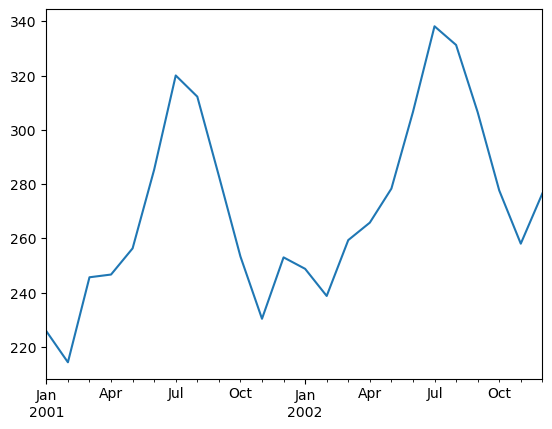

In [144]:
predictions.plot()

In [145]:
predictions

2001-01-01    225.823281
2001-02-01    214.367580
2001-03-01    245.688818
2001-04-01    246.692591
2001-05-01    256.340207
2001-06-01    285.359524
2001-07-01    320.042883
2001-08-01    312.244867
2001-09-01    283.046203
2001-10-01    253.340875
2001-11-01    230.395935
2001-12-01    253.020201
2002-01-01    248.799003
2002-02-01    238.800595
2002-03-01    259.383417
2002-04-01    265.820179
2002-05-01    278.350252
2002-06-01    306.597437
2002-07-01    338.167157
2002-08-01    331.279471
2002-09-01    306.529939
2002-10-01    277.696839
2002-11-01    258.066970
2002-12-01    276.563145
Freq: MS, Name: predicted_mean, dtype: float64

In [146]:
# Check the shape of the input arrays
if test_data['Passengers'].shape[0] > 1 and predictions.shape[0] > 1:
    # Calculate the mean squared error
    mse = mean_squared_error(test_data['Passengers'], predictions)

    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
else:
    print('Error: Input arrays have only one element')

RMSE: 39.41058364785739


In [147]:
""" RMSE: 39.41058364785739 """
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   72
Model:                ARIMA(11, 2, 2)   Log Likelihood                -265.068
Date:                Tue, 23 Jan 2024   AIC                            558.135
Time:                        18:29:53   BIC                            589.614
Sample:                    01-01-1995   HQIC                           570.639
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8378      0.198     -4.225      0.000      -1.226      -0.449
ar.L2         -0.8929      0.099     -8.988      0.000      -1.088      -0.698
ar.L3         -0.8685      0.138     -6.303      0.000      -1.139      -0.598
ar.L4         -0.8772      0.122     -7.174      0.000      -1.117      -0.638
ar.L5         -0.8014      0.140     -5.719      0.000      -1.076      -0.527
ar.L6         -0.8445      0.104     -8.140      0.000      -1.048      -0.641
ar.L7         -0.8120      0.137     -5.913      0.000      -1.081      -0.543
ar.L8         -0.9278      0.103     -9.030      0.000      -1.129      -0.726
ar.L9         -0.8231      0.117     -7.036      0.000      -1.052      -0.594
ar.L10        -0.9042      0.099     -9.129      0.000      -1.098      -0.710
ar.L11        -0.7692      0.135     -5.717      0.000      -1.033      -0.506
ma.L1         -0.3940      0.263     -1.496      0.135      -0.910       0.122
ma.L2         -0.0291      0.264     -0.111      0.912      -0.546       0.487
sigma2        89.4469     19.803      4.517      0.000      50.634     128.259
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.54
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               3.36   Skew:                             0.73
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
test_data['predictions'] = predictions 

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_12840\3774221262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = predictions


<AxesSubplot:xlabel='Date'>

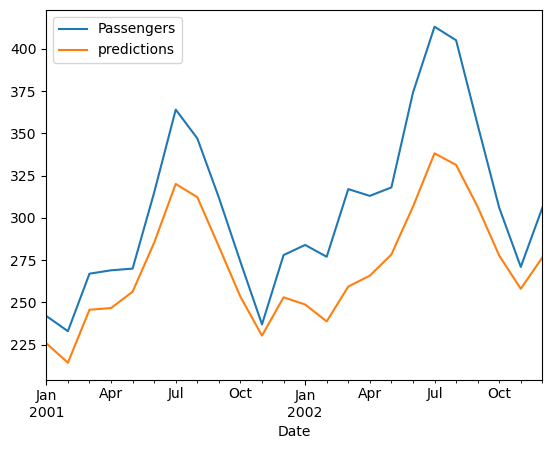

In [149]:
test_data[['Passengers','predictions']].plot() 

In [150]:
"""  SARIMAX   """
# Fit SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA = SARIMAX(train_data['Passengers'], order=(11, 2, 2), seasonal_order=(0, 0, 0, 12))
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Convergen

In [151]:
# Make predictions on the testing set
predictions_SARIMA = model_SARIMA_fit.forecast(steps=len(test_data))


In [152]:
# Check the shape of the input arrays
if test_data['Passengers'].shape[0] > 1 and predictions_SARIMA.shape[0] > 1:
    # Calculate the mean squared error
    mse = mean_squared_error(test_data['Passengers'], predictions_SARIMA)

    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
else:
    print('Error: Input arrays have only one element')

RMSE: 39.41058364785739


In [153]:
# Display model summary
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   72
Model:              SARIMAX(11, 2, 2)   Log Likelihood                -265.068
Date:                Tue, 23 Jan 2024   AIC                            558.135
Time:                        18:30:46   BIC                            589.614
Sample:                    01-01-1995   HQIC                           570.639
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8378      0.198     -4.225      0.000      -1.226      -0.449
ar.L2         -0.8929      0.099     -8.988      0.000      -1.088      -0.698
ar.L3         -0.8685      0.138     -6.303      0.000      -1.139      -0.598
ar.L4         -0.8772      0.122     -7.174      0.000      -1.117      -0.638
ar.L5         -0.8014      0.140     -5.719      0.000      -1.076      -0.527
ar.L6         -0.8445      0.104     -8.140      0.000      -1.048      -0.641
ar.L7         -0.8120      0.137     -5.913      0.000      -1.081      -0.543
ar.L8         -0.9278      0.103     -9.030      0.000      -1.129      -0.726
ar.L9         -0.8231      0.117     -7.036      0.000      -1.052      -0.594
ar.L10        -0.9042      0.099     -9.129      0.000      -1.098      -0.710
ar.L11        -0.7692      0.135     -5.717      0.000      -1.033      -0.506
ma.L1         -0.3940      0.263     -1.496      0.135      -0.910       0.122
ma.L2         -0.0291      0.264     -0.111      0.912      -0.546       0.487
sigma2        89.4469     19.803      4.517      0.000      50.634     128.259
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.54
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               3.36   Skew:                             0.73
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
# Add predictions to test_data
test_data['predictions_SARIMA'] = predictions_SARIMA

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_12840\3154040034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions_SARIMA'] = predictions_SARIMA


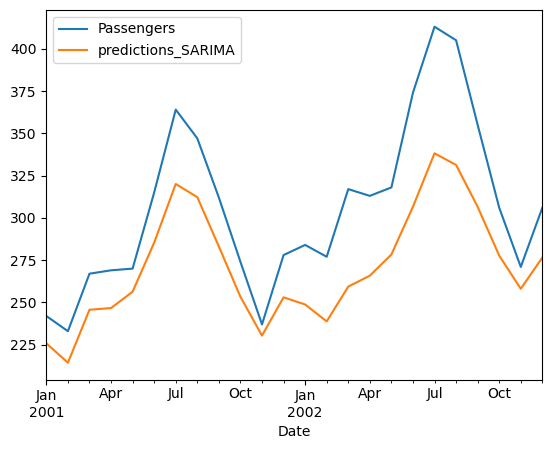

In [155]:
# Plot actual vs predicted values
test_data[['Passengers', 'predictions_SARIMA']].plot()
plt.show()

In [156]:
""" considering the data to be seasonal checking with the results for arima and sarimax models """

from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [157]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(train_data['Passengers'], order=(3, 0, 5))
model_ARIMA_fit = model_ARIMA.fit()

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertib

In [158]:
predictions_ARIMA = model_ARIMA_fit.forecast(steps=len(test_data))

In [159]:
# Fit SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA = SARIMAX(train_data['Passengers'], order=(3, 0, 5), seasonal_order=(0, 1, 0, 12))
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [160]:
predictions_SARIMA = model_SARIMA_fit.forecast(steps=len(test_data))

In [164]:
# Calculate RMSE for ARIMA
from sklearn.metrics import mean_squared_error
mse_ARIMA = mean_squared_error(test_data['Passengers'], predictions_ARIMA)
rmse_ARIMA = np.sqrt(mse_ARIMA)

In [165]:
print('RMSE (ARIMA):', rmse_ARIMA)     # RMSE (ARIMA): 93.65522867781553

RMSE (ARIMA): 93.65522867781553


In [166]:
# Calculate RMSE for SARIMA
from sklearn.metrics import mean_squared_error
mse_SARIMA = mean_squared_error(test_data['Passengers'], predictions_SARIMA)
rmse_SARIMA = np.sqrt(mse_SARIMA)

In [167]:
print('RMSE (SARIMA):', rmse_SARIMA)   # RMSE (SARIMA): 43.83804024234288

RMSE (SARIMA): 43.83804024234288


In [168]:
# Plot actual vs predicted values for both models
import matplotlib.pyplot as plt

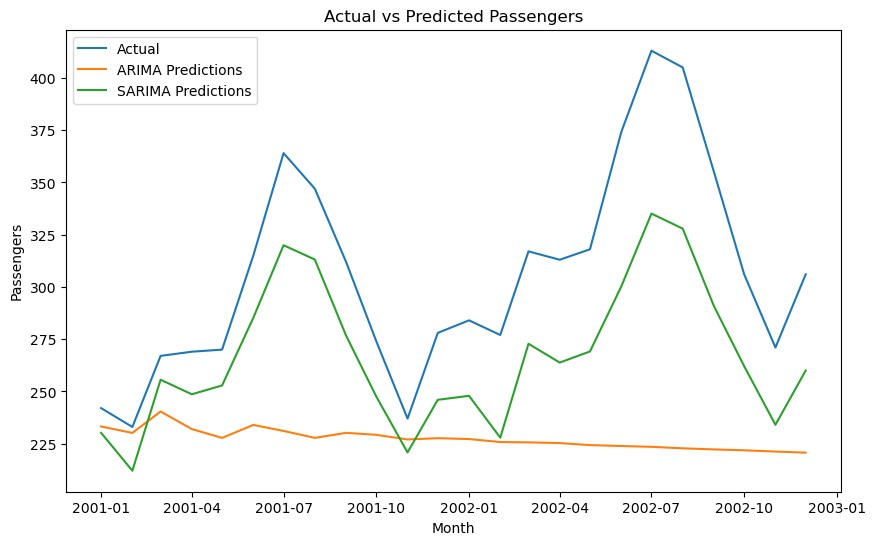

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Passengers'], label='Actual')
plt.plot(predictions_ARIMA, label='ARIMA Predictions')
plt.plot(predictions_SARIMA, label='SARIMA Predictions')
plt.legend()
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [170]:
""" SARIMA MODEL GIVES US THE BETTER RESULTS THAN REST OF THE MODELS APPLIED FOR GIVEN DATASET"""

' SARIMA MODEL GIVES US THE BETTER RESULTS THAN REST OF THE MODELS APPLIED FOR GIVEN DATASET'